<img src="Images/aiwithai.png" width="100%">

## Feature Transformations using sklearn

     :Function transformer
        - Log transform
        - Reciprocal transform
        - square transform
    :Power transformer
        - Box-Cox transform
        - Yeo-Johnson transform       

**California Housing dataset**

**Data Set Characteristics**
    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297ility Letters, 33 (1997) 291-297ability Letters, 33 (1997) 291-297Probability Letters, 33 (1997) 291-297

# Logarithm transformation

In [4]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import FunctionTransformer

In [5]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# Plot histogram and Q-Q plots to explore the variable distribution


def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

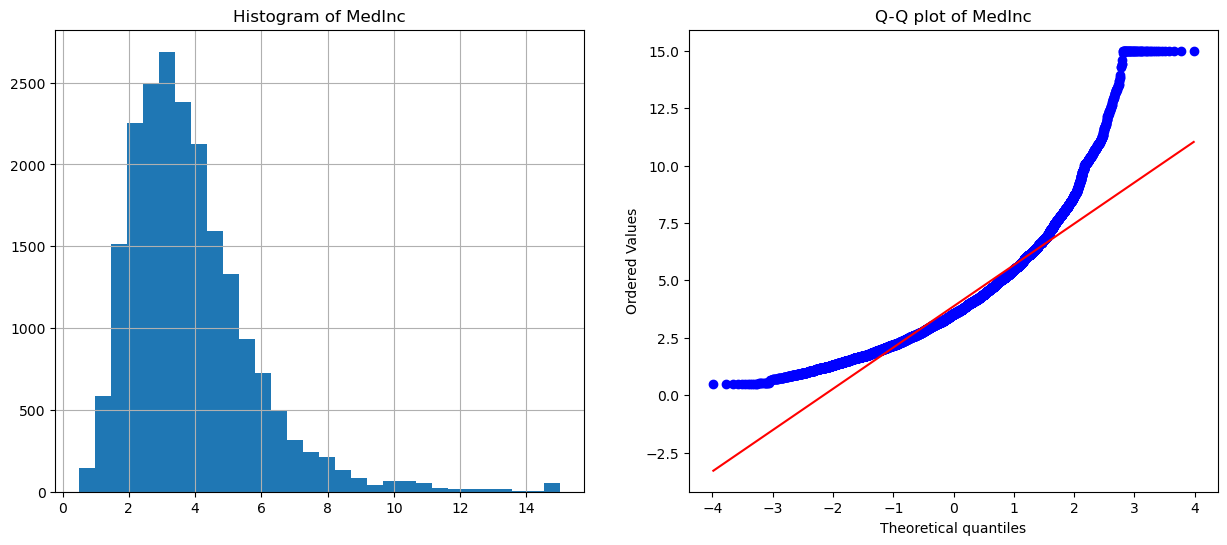

In [7]:
# Check function output

diagnostic_plots(X, "MedInc")

In [8]:
# list with the variables to transform

variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

# Logarithmic transformation with Scikit-learn

In [9]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [7]:
# set up the transformer with NumPy log as parameter

transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

In [8]:
# transform subset of dataframe (remember that we
# made a copy earlier.)

X_tf[variables] = transformer.transform(X[variables])

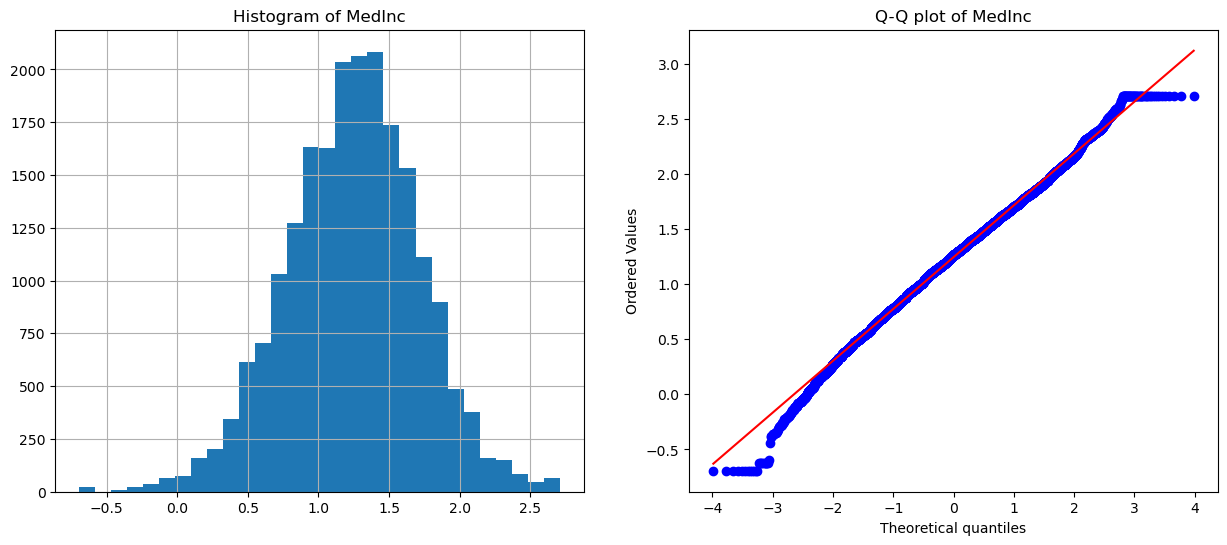

In [9]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")

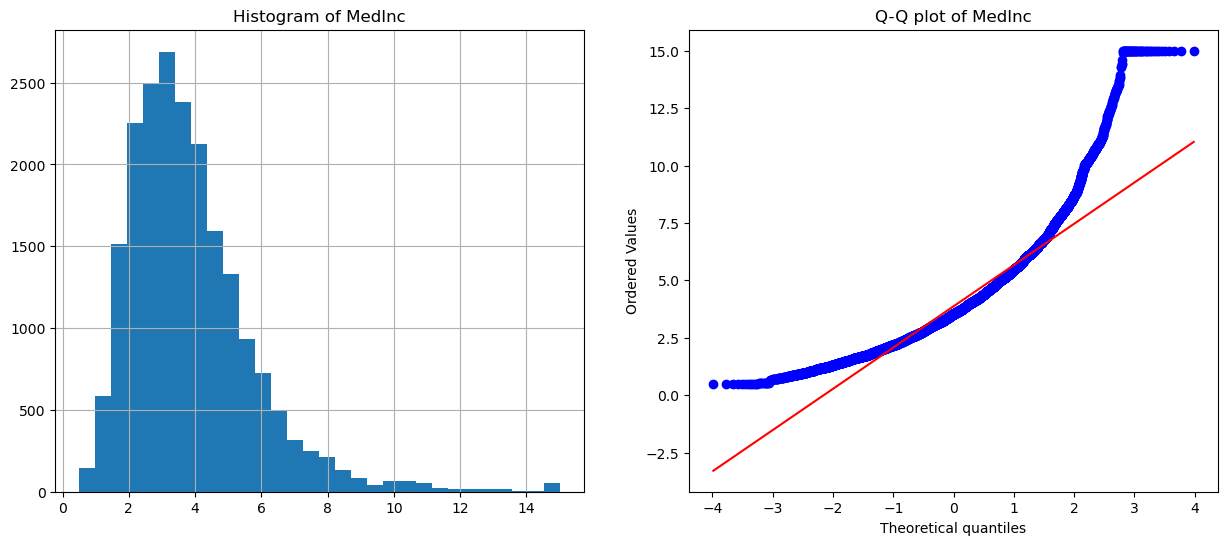

In [10]:
# revert to the original representation

X_tf[variables] = transformer.inverse_transform(X_tf[variables])

diagnostic_plots(X_tf, "MedInc")

# Logarithm plus constant

If you want to add a constant to the variables, say because some of their values are 0 or negative, this is how to do it.

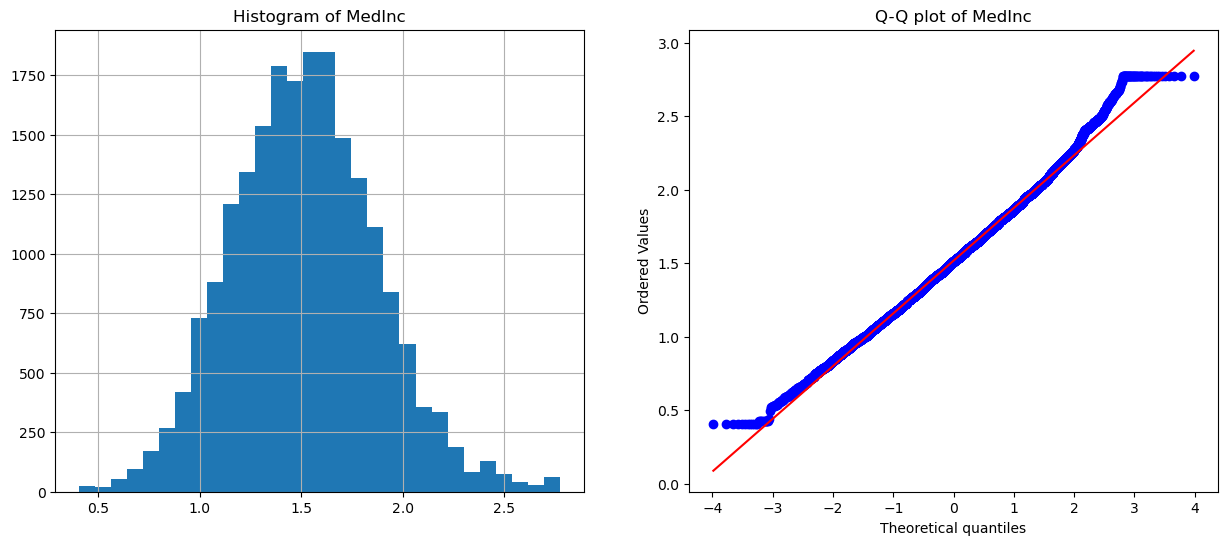

In [11]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

# set up the transformer

transformer = FunctionTransformer(lambda x: np.log(x + 1))

# transform subset of dataframe

X_tf[variables] = transformer.transform(X[variables])

# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")

# Reciprocal transformation with Scikit-learn

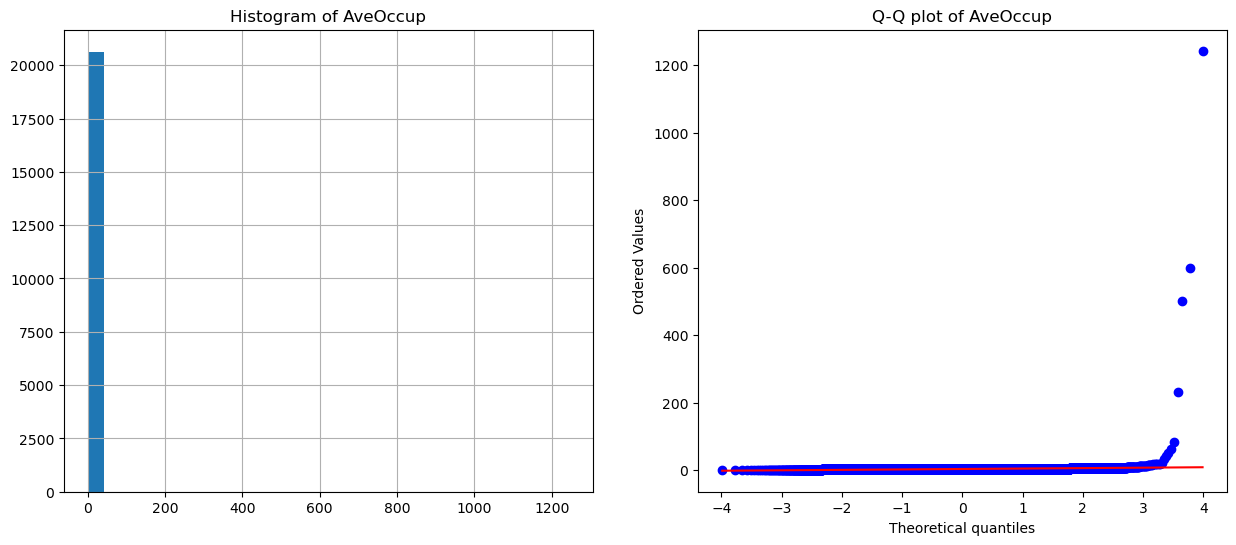

In [10]:
# Check function output

# AveOccup = average number of household members (number of people per household)
# AveOccup = number of members / number of houses

diagnostic_plots(X, "AveOccup")

In [12]:
# start the transformer with NumPy reciprocal as parameter

transformer = FunctionTransformer(func=np.reciprocal)

In [13]:
# transform subset of dataframe

X_tf["AveOccup"] = transformer.transform(X["AveOccup"])

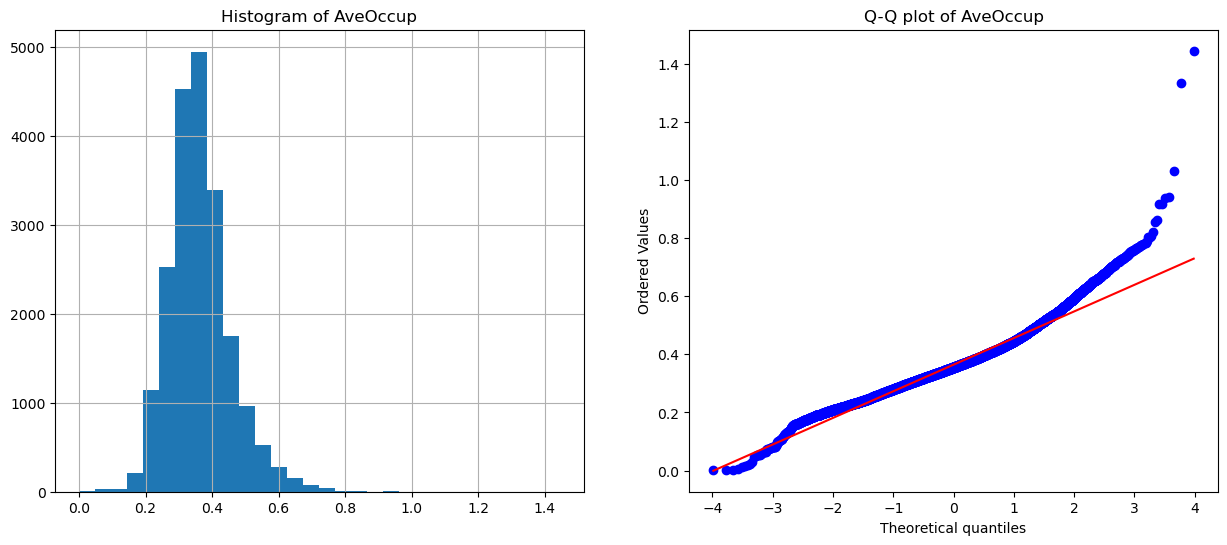

In [14]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "AveOccup")

# Square-root transformation

In [16]:
# create dataframe
df = pd.DataFrame()

# draw samples from a poisson distribution
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

# display top rows
df.head()

,counts1,counts2
0,6,1
1,7,0
2,6,3
3,1,1
4,3,2


In [17]:
# make a copy of the data

df_tf = df.copy()

In [18]:
# set up transformer with desired operations

transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))

In [20]:
# transform slice of dataframe with variables to transform

df_tf = transformer.transform(df[["counts1", "counts2"]])

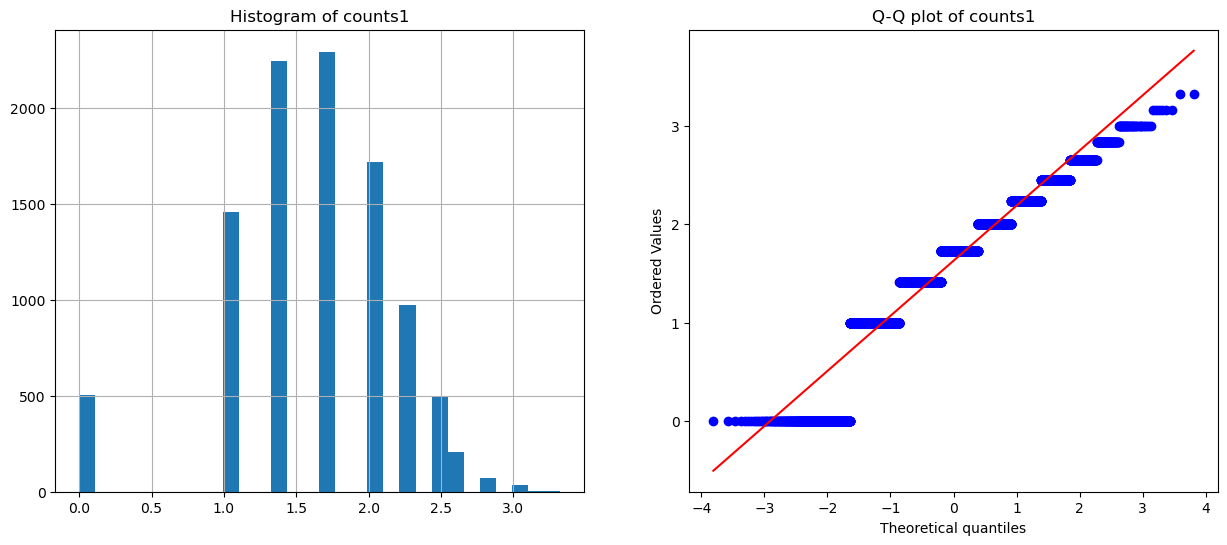

In [21]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts1")

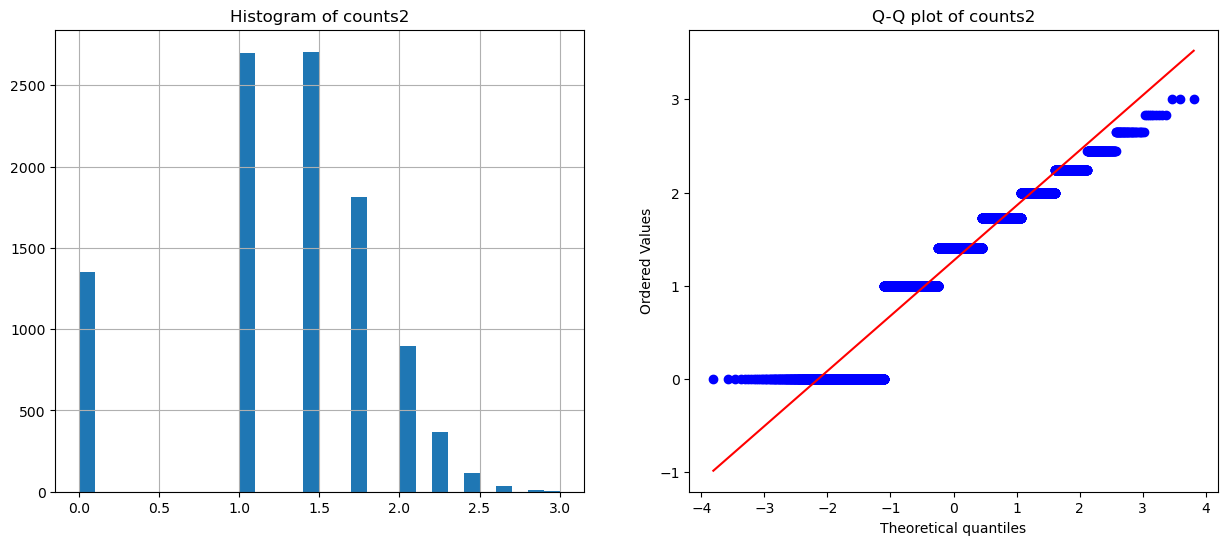

In [22]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts2")

# Power transformation

In [22]:
variables = ["MedInc", "Population"]

In [23]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [24]:
# set up the transformer with a user defined function, in this
# case the 0.3 power transformation

transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

In [26]:
# transform slice of dataframe with indicated variables

X_tf[variables] = transformer.transform(X[variables])

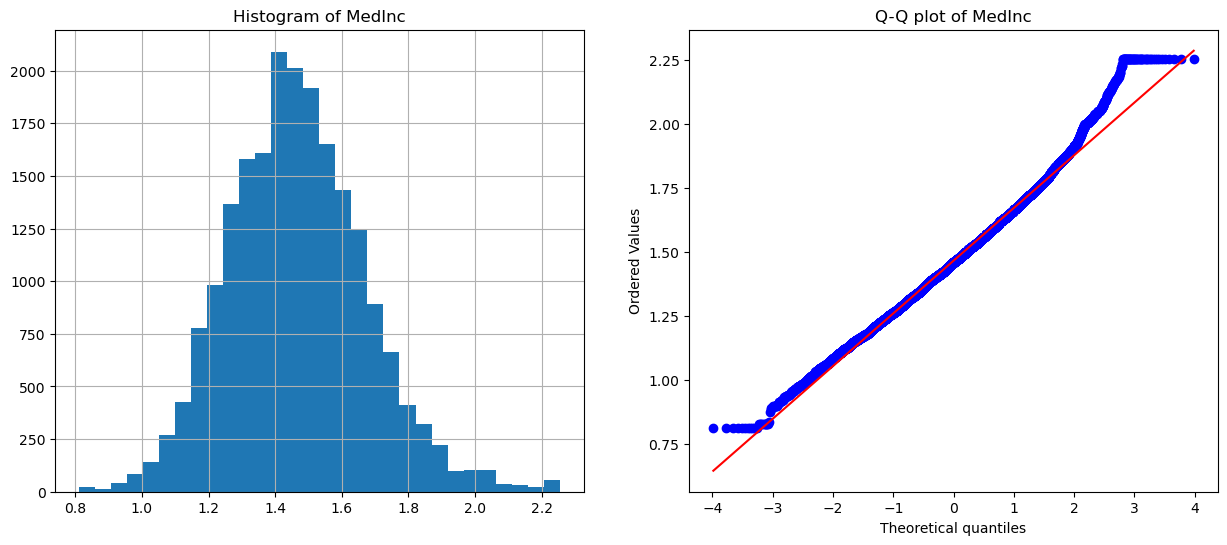

In [27]:
# visualize the transformation (not in book)

diagnostic_plots(X_tf, "MedInc")

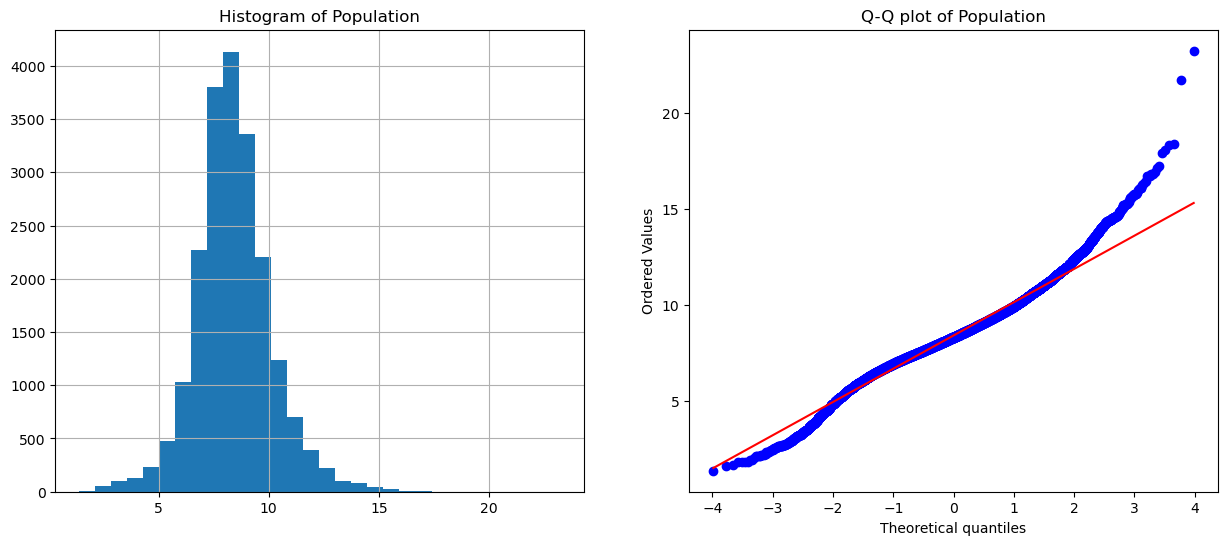

In [28]:
diagnostic_plots(X_tf, "Population")

# Box-Cox transformation

In [29]:
# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


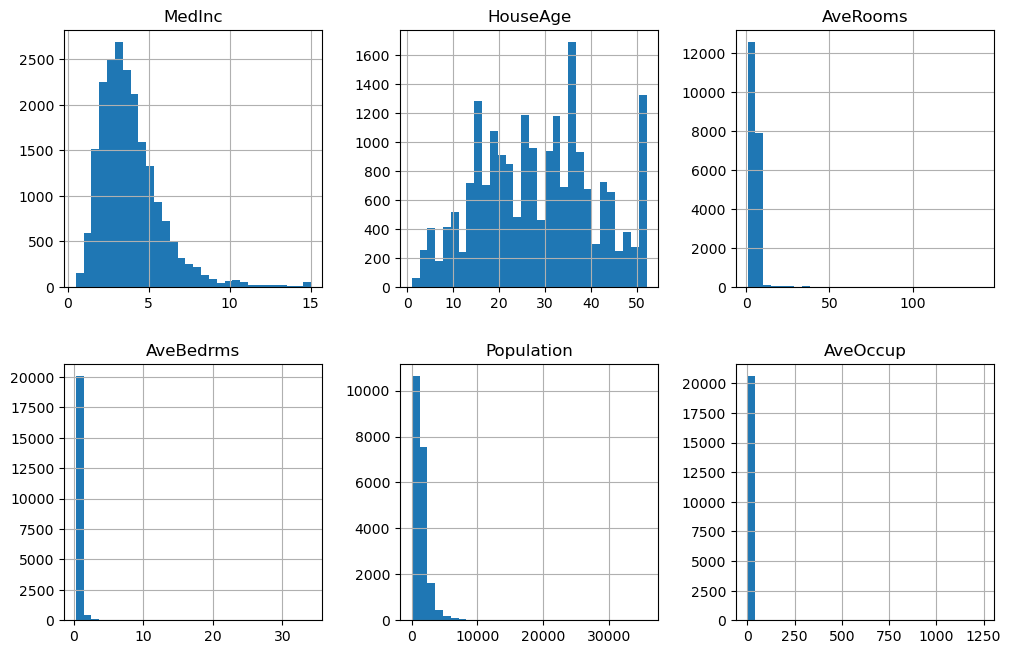

In [30]:
# Plot histograms to inspect variable distributions

X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [31]:
# capture variable names in a list

variables = list(X.columns)

variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [33]:
# Make Q-Q plots for all variables


def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

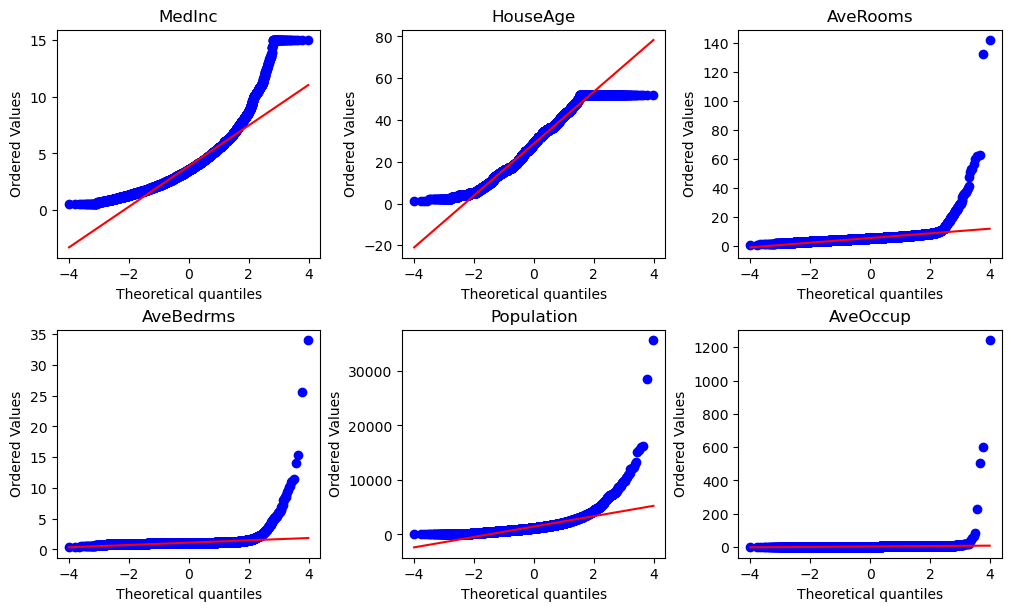

In [34]:
make_qqplot(X)

# Box-Cox transformation with Scikit-learn

In [35]:
# with open-source packages
from sklearn.preprocessing import PowerTransformer

In [36]:
# initialize the transformer with box-cox

transformer = PowerTransformer(method="box-cox", standardize=False)

transformer.set_output(transform="pandas")

PowerTransformer(method='box-cox', standardize=False)

In [37]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

PowerTransformer(method='box-cox', standardize=False)

In [38]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 , -1.62900026,  0.23576758,
       -0.47630323])

In [39]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.337069,23.723216,1.475350,0.023085,12.308116,0.756645
1,2.333598,13.286954,1.410978,-0.029195,22.335341,0.628291
2,2.171691,29.017459,1.568866,0.066936,14.082654,0.814315
3,1.873879,29.017459,1.370082,0.066615,14.598635,0.754737
4,1.432988,29.017459,1.415020,0.073214,14.654092,0.651500
...,...,...,...,...,...,...
20635,0.453991,15.488038,1.284035,0.113228,16.535104,0.757908
20636,0.979953,11.583480,1.399297,0.221297,12.704453,0.878932
20637,0.543627,11.003934,1.303230,0.103551,17.412274,0.694971
20638,0.642493,11.583480,1.317575,0.139802,15.901621,0.632710


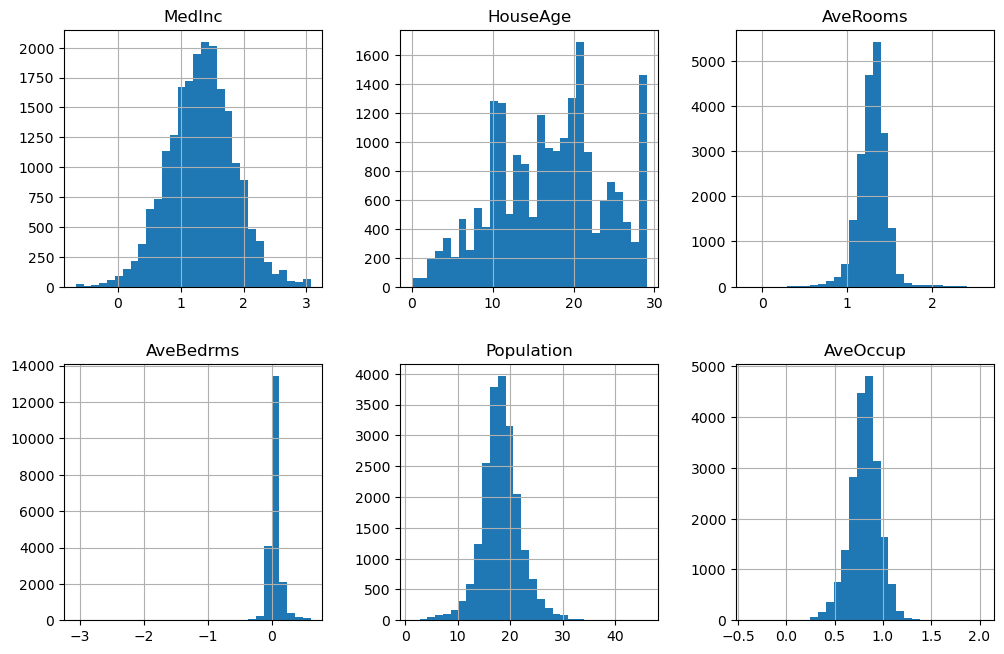

In [40]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

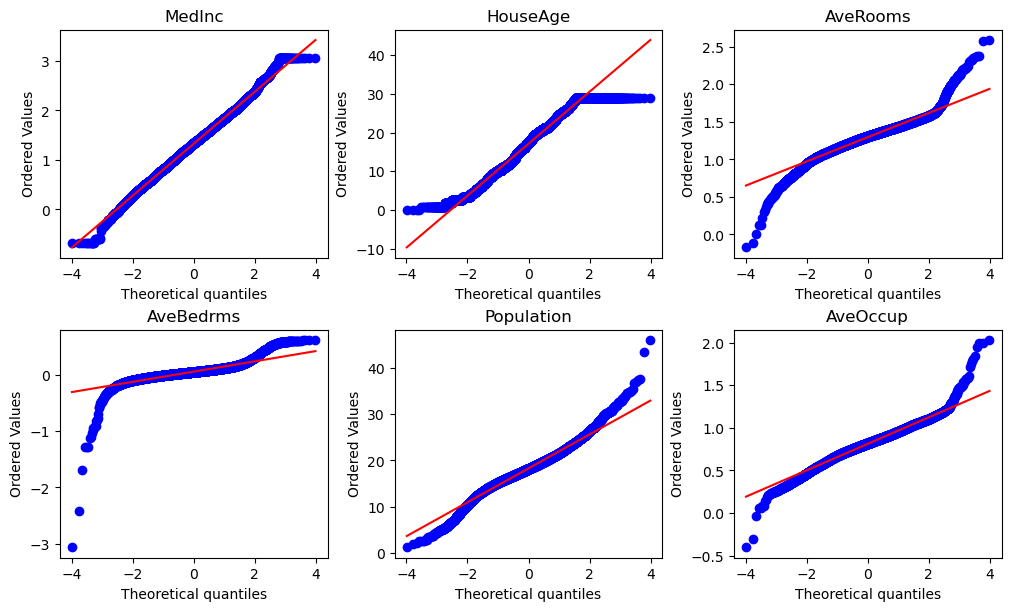

In [41]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)

# Yeo-Johnson transformation

In [42]:
# initialize a transformer with yeo-johnson

transformer = PowerTransformer(method="yeo-johnson", standardize=False)

transformer.set_output(transform="pandas")

PowerTransformer(standardize=False)

In [43]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

PowerTransformer(standardize=False)

In [44]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

array([-0.19850989,  0.80814809, -0.5536698 , -4.39408222,  0.23352364,
       -0.90134563])

In [45]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,1.803599,24.133444,1.234372,0.217303,12.223224,0.755821
1,1.801958,13.807367,1.202460,0.216060,22.087944,0.710445
2,1.724579,29.380778,1.280312,0.218341,13.970688,0.776570
3,1.578385,29.380778,1.182107,0.218334,14.478725,0.755137
4,1.354895,29.380778,1.204470,0.218489,14.533326,0.718551
...,...,...,...,...,...,...
20635,0.857611,15.981965,1.139177,0.219428,16.384868,0.756273
20636,1.121673,12.126445,1.196652,0.221895,12.613530,0.799990
20637,0.901462,11.555094,1.148759,0.219202,17.247984,0.733858
20638,0.950502,12.126445,1.155919,0.220045,15.761405,0.711984


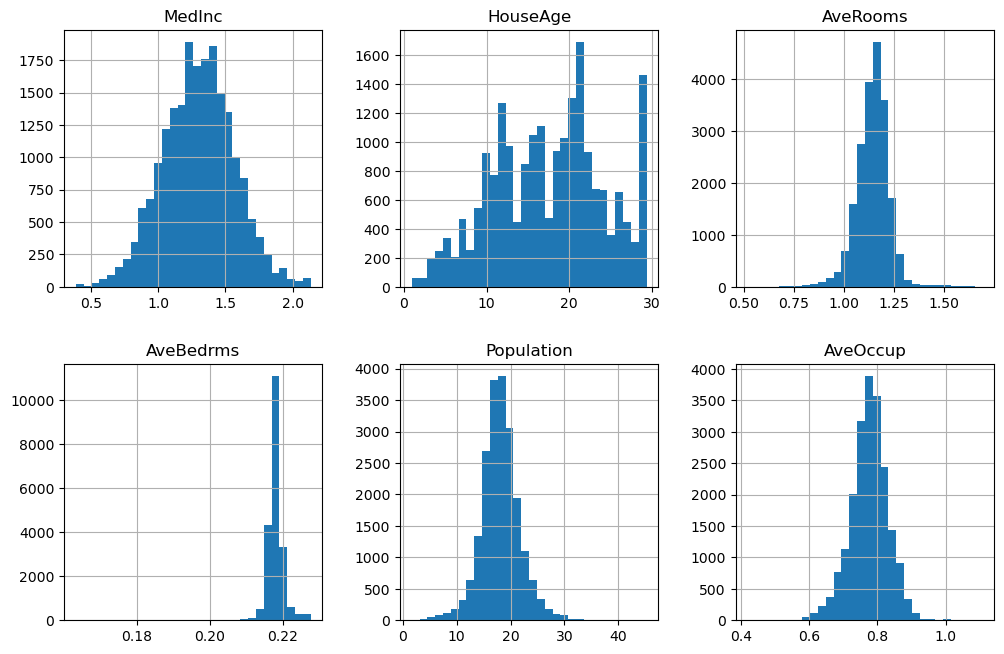

In [46]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

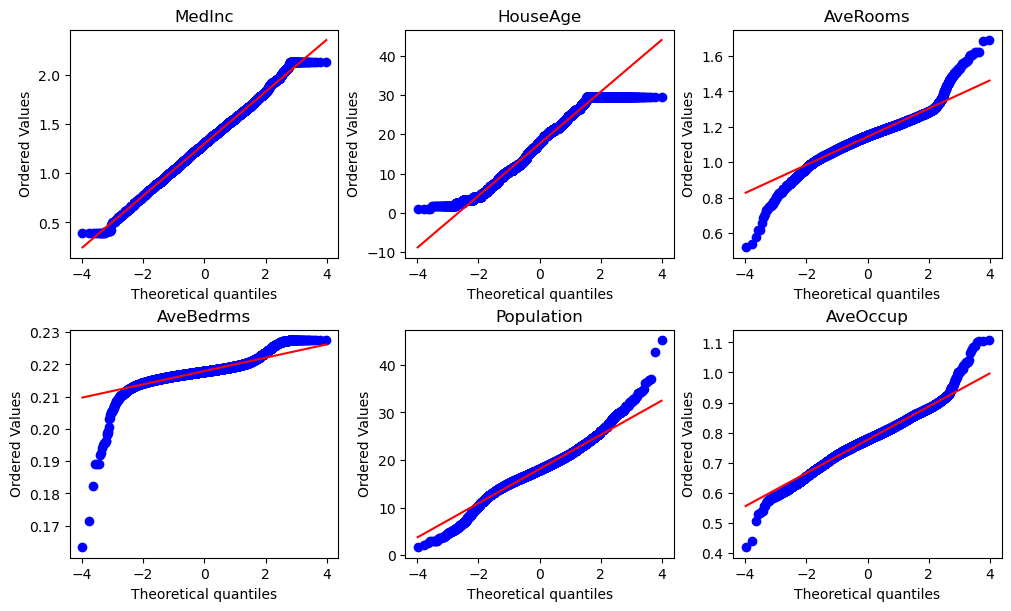

In [47]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)